# Experimental Research in HCI



Like other scientific fields, experimental research in HCI follows the **scientific method**. It typically involves conducting **controlled experiments**, usually conducted in a lab setting.


##### Key Elements of Experimental Research:

- At least **two variables** are required:
    - **Manipulated Variable** (aka **independent variable**): The variable that is changed or controlled by the researcher.
    - **Response Variable** (aka **dependent variable**): The outcome or effect that is measured in response to changes in the independent variable.

- **Cause-and-effect conclusions** are possible and usually sought:
    - This means that changes in the manipulated variable (independent variable) can be linked to changes in the response variable (dependent variable) while carefully considering all other variables.
    - Controlled experiments are ideal for establishing these causal relationships.

Let's look into what these variables are...

## **Independent Variable (IV)**

- A variable that the experimenter manipulates to observe its effect on the dependent variable.
- It is called 'independent' because it is independent of participants' actions.
- Examples: Interface type, feedback mode (audio, visual), device type, etc.

An independent variable (IV) must have at least two levels. The levels, values, or settings for an IV
are known as the **test conditions**. It is essential to clearly name both the factor (IV) and its levels
(test conditions) when designing an experiment.

Below is a table that illustrates some examples of factors (IVs) and their corresponding levels:

| **Factor (IV)**         | **Levels (Test Conditions)**             |
|-------------------------|------------------------------------------|
| **Device**              | Mouse, Trackball, Joystick               |
| **Feedback mode**       | Audio, Tactile, None                     |
| **Task**                | Pointing, Dragging                       |
| **Visualization**       | 2D, 3D, Animated                         |
| **Search interface**    | Google, Custom                           |

In any experiment, it is important to define these levels carefully to ensure the comparison between
different conditions is meaningful and captures the variations of interest.

### How Many Independent Variables (IVs)?

- An experiment must have at least one independent variable (IV).
- It is possible to have 2, 3, or more IVs in a study.
- However, the number of interactions or **effects** increases rapidly with the size of the experiment.

The table below illustrates how the number of possible effects grows as the number of IVs increases:

| **IVs** | **Main** | **2-way** | **3-way** | **4-way** | **5-way** | **Total** |
|---------------------------|----------|-----------|-----------|-----------|-----------|-----------|
| 1                         | 1        | -         | -         | -         | -         | 1         |
| 2                         | 2        | 1         | -         | -         | -         | 3         |
| 3                         | 3        | 3         | 1         | -         | -         | 7         |
| 4                         | 4        | 6         | 3         | 1         | -         | 14        |
| 5                         | 5        | 10        | 6         | 3         | 1         | 25        |

As the table shows, while a single IV results in a single main effect, adding more IVs increases the number of potential interaction effects. For example:
- With 2 IVs, there is 1 possible two-way interaction.
- With 3 IVs, there are 3 possible two-way interactions and 1 three-way interaction.
- With 5 IVs, the complexity increases to include up to 10 two-way interactions, 6 three-way interactions, and even higher-order interactions.

This growth in complexity can make analysis and interpretation more challenging, which is why simpler experimental designs are often recommended...


## **Dependent Variable (DV)**

   - A variable that is measured to assess the effect of the independent variable.
   - Depdendent because it **depends** on participants' responses or behaviors.
   - Needs to be clearly defined.
   - Examples: Task completion time, user satisfaction score, error rate, etc.


## More Variables...
### **Control Variable**:
   - Variables that are kept constant throughout the experiment to prevent them from influencing the results.
   - Controlling these variables ensures that any observed effects are due to the independent variable.
   - Examples: Font size, screen brightness, room lighting.

### **Random Variable**:
   - A variable that is allowed to vary randomly across participants or sessions, introducing some variability
     into the measures.
   - While this adds noise to the data, it also makes the findings more generalizable.
   - Examples: Amount of sleep participants had before the experiment, prior experience with the technology.

### **Confounding Variable**:
   - A variable that varies systematically with the independent variable and could potentially influence
     the dependent variable, leading to misleading results.
   - It is important to identify and control confounding variables to ensure the validity of the experiment.
   - Examples: If testing a new typing technique on two devices where one device has a larger keyboard,
     the device size could be a confounding variable affecting typing speed.

# Introduction to Python, Loading Libraries, Pandas, Reading Data, and Plotting!

In this demo we will get more practice working with Pandas, slicing data, and some simple plotting. At the very end we will do a bit more complex analysis and make a model!

In [70]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/hci-assignment-3
# !git pull
# %cd _demos

Mounted at /content/drive
/content/drive/My Drive/hci-assignment-3


In [75]:
!pip install scikit-posthocs
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency, mannwhitneyu, friedmanchisquare, kruskal
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
from scikit_posthocs import posthoc_dunn
import os

# Choosing the Right Statistical Test

Selecting the appropriate statistical test depends on the **measurement scale** of your data, the **type of data** you have, and the **number of conditions** or groups you want to compare. Here's a guide to help determine the best test:

## 1. Measurement Scales and Data Types

| Measurement Scale | Defining Relations                       | Examples of Appropriate Statistics | Appropriate Statistical Tests           |
|-------------------|------------------------------------------|------------------------------------|----------------------------------------|
| **Nominal**       | Equivalence                              | Mode, Frequency                    | Non-parametric tests (e.g., Chi-square) |
| **Ordinal**       | Equivalence, Order                       | Median, Percentile                 | Non-parametric tests                    |
| **Interval**      | Equivalence, Order, Ratio of intervals   | Mean, Standard Deviation           | Parametric tests, Non-parametric tests  |
| **Ratio**         | Equivalence, Order, Ratio of values      | Geometric Mean, Coefficient of Variation | Parametric tests, Non-parametric tests |

### Parametric vs. Non-parametric Tests

- **Parametric Tests** are most appropriate for **ratio** and **interval** data because they assume a certain distribution (e.g., normality).
- **Non-parametric Tests** are best for **ordinal** and **nominal** data, as they don't rely on distributional assumptions and are more robust to outliers.

## 2. Choosing a Test Based on Conditions and Design

The choice of test also depends on the **number of conditions** (groups) and the **design** (between-subjects or within-subjects):

| Design                      | Conditions | Appropriate Tests                              |
|-----------------------------|------------|------------------------------------------------|
| **Between-subjects**       | 2          | Mann-Whitney U Test                            |
|                           | 3 or more  | Kruskal-Wallis Test                            |
| **Within-subjects**        | 2          | Wilcoxon Signed-Rank Test                      |
|                           | 3 or more  | Friedman Test                                  |

### Summary of Tests:
- **ANOVA (Analysis of Variance)**:
  - Used to compare the means of **three or more independent groups** with **interval** or **ratio** data.
  - Assumes **normal distribution** of data and **homogeneity of variance** (similar variances across groups).
  - Provides an overall test of differences among group means but does not specify which pairs are different. For detailed pairwise comparisons, **post hoc tests** (e.g., Tukey's HSD) are often used after a significant ANOVA result.

- **Chi-square test**:
  - Used for **nominal data**, especially to compare observed and expected frequencies.
  - Suitable for testing associations between categorical variables.

- **Mann-Whitney U Test**:
  - Non-parametric test used for comparing **two independent groups** when data is **ordinal** or not normally distributed.
  - Often used as an alternative to the **independent samples t-test** when assumptions of normality are not met.

- **Wilcoxon Signed-Rank Test**:
  - Non-parametric test used for comparing **two related groups** when data is **ordinal** or not normally distributed.
  - Often used as an alternative to the **paired samples t-test** for related samples.

- **Kruskal-Wallis Test**:
  - Non-parametric alternative to **ANOVA** for comparing **three or more independent groups** when data is **ordinal** or not normally distributed.
  - Suitable for situations where ANOVA assumptions are not met, but does not specify which groups differ from each other (post hoc tests can follow).

- **Friedman Test**:
  - Used for comparing **three or more related groups** when data is **ordinal** or not normally distributed.
  - Non-parametric equivalent of repeated measures **ANOVA**.
  - Suitable for within-subjects designs.




## ANOVA Test

##### Research Question: Is there a significant difference in task completion times across four different interface methods?
##### Experiment Details: 12 participants completed a text entry task using four interface methods (A, B, C, D). Times recorded in seconds.
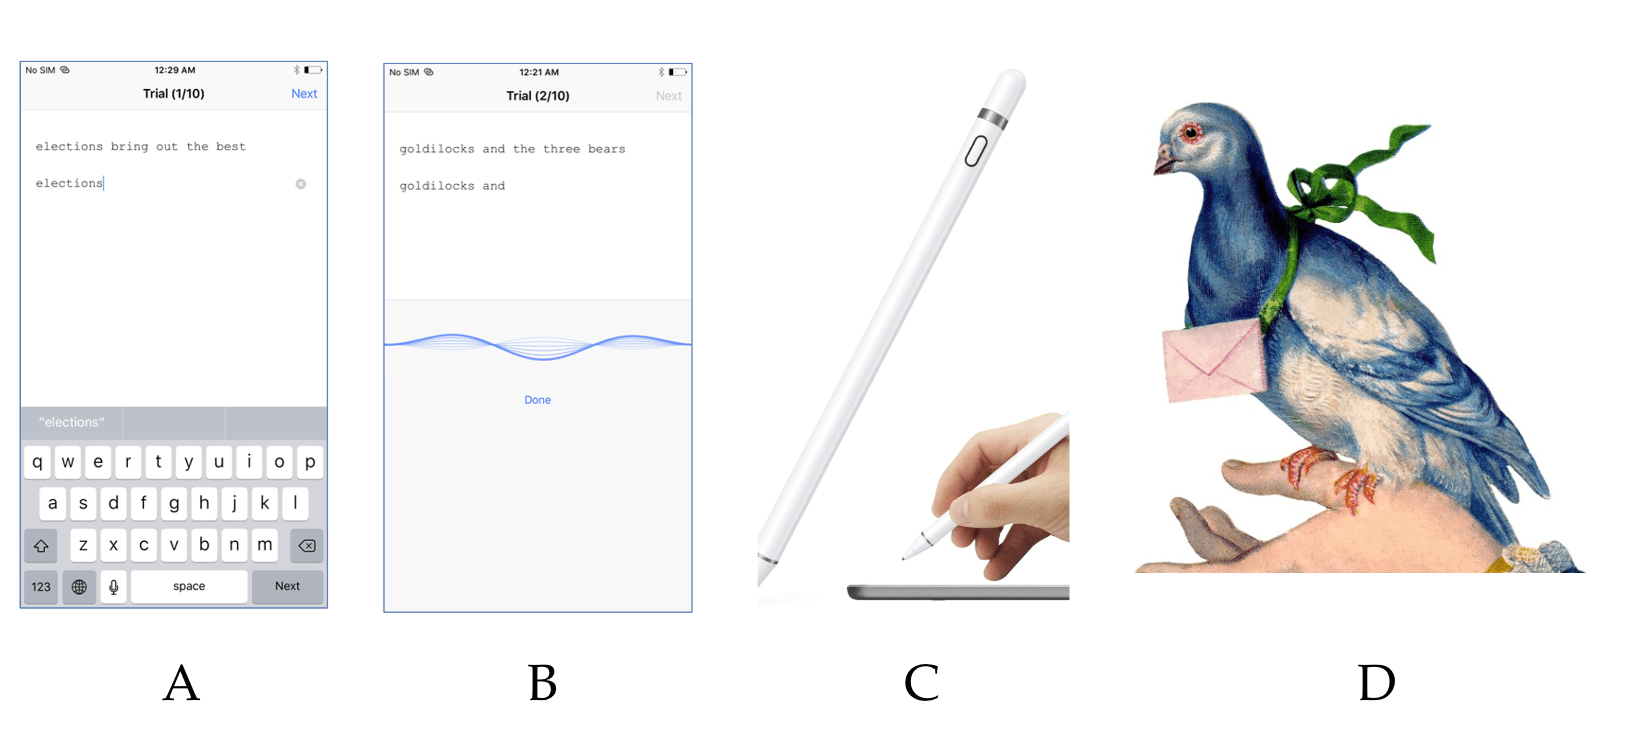


In [ ]:
data = {
    'Method_A': [10, 12, 18, 24, 36, 11, 14, 19, 23, 38, 29, 31],
    'Method_B': [29, 29, 30, 31, 31, 17, 18, 19, 19, 20, 28, 30],
    'Method_C': [25, 28, 29, 27, 29, 10, 11, 12, 12, 13, 25, 27],
    'Method_D': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
}
df = pd.DataFrame(data)
df

,Method_A,Method_B,Method_C,Method_D
0,10,29,25,11
1,12,29,28,12
2,18,30,29,13
3,24,31,27,14
4,36,31,29,15
5,11,17,10,16
6,14,18,11,17
7,19,19,12,18
8,23,19,12,19
9,38,20,13,20


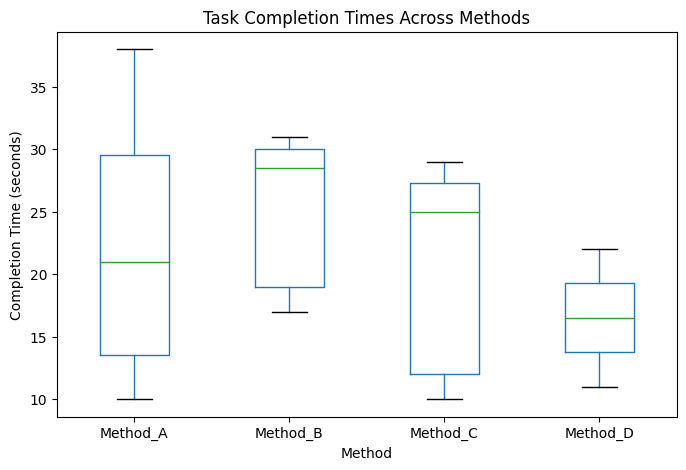

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column=['Method_A', 'Method_B', 'Method_C', 'Method_D'])
plt.title('Task Completion Times Across Methods')
plt.xlabel('Method')
plt.ylabel('Completion Time (seconds)')
plt.grid(False)
plt.show()

In [ ]:
# Perform ANOVA
f_stat, p_value = f_oneway(df['Method_A'], df['Method_B'], df['Method_C'], df['Method_D'])
print(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")

ANOVA result: F-statistic = 2.943, p-value = 0.043



Tukey's HSD Post Hoc Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
Method_A Method_B      3.0 0.7387  -4.8526 10.8526  False
Method_A Method_C  -1.4167 0.9628  -9.2692  6.4359  False
Method_A Method_D  -5.5833 0.2435 -13.4359  2.2692  False
Method_B Method_C  -4.4167 0.4451 -12.2692  3.4359  False
Method_B Method_D  -8.5833 0.0273 -16.4359 -0.7308   True
Method_C Method_D  -4.1667 0.4959 -12.0192  3.6859  False
---------------------------------------------------------


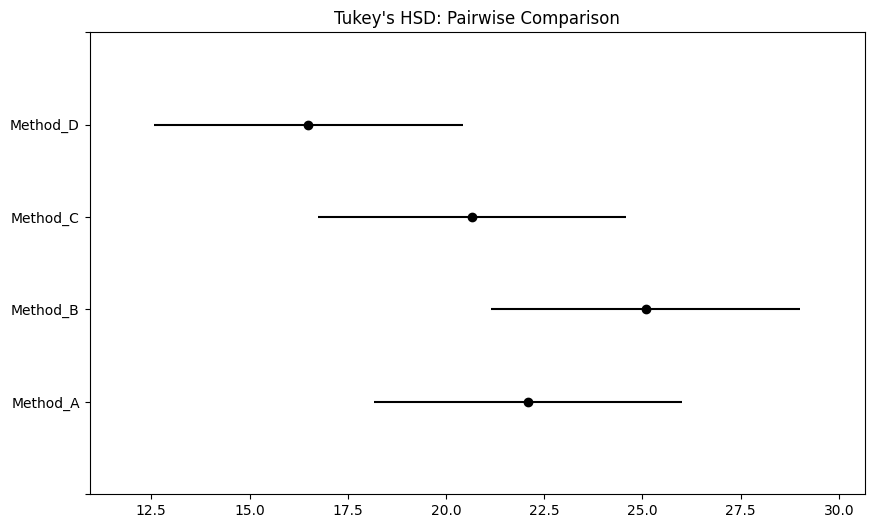

In [ ]:
df_melt = df.melt(var_name='Method', value_name='Completion_Time')

if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(df_melt['Completion_Time'], df_melt['Method'], alpha=0.05)
    print("\nTukey's HSD Post Hoc Test Results:")
    print(tukey_result)

    # Visualization of Tukey's HSD results
    tukey_result.plot_simultaneous()
    plt.title("Tukey's HSD: Pairwise Comparison")
    plt.show()
else:
    print("ANOVA was not significant; no post hoc test needed.")

# Chi-Squared Test
##### Research Question: Is there an association between gender and preferred scrolling method?
##### Experiment Details: 150 participants indicated their preferred scrolling method (Mouse Wheel, Clicking/Dragging, Keyboard).
##### Data represents the counts of preferences between genders.

Women-Clicking-the-Mouse-Button-on-a-Table.avif

In [ ]:
# Data: Gender (Male, Female) vs. Scrolling method (MW, CD, KB)
data = [[30, 20, 50],  # Male: MW, CD, KB
        [35, 25, 40]]  # Female: MW, CD, KB
df_chi2 = pd.DataFrame(data, columns=["MW", "CD", "KB"], index=["Male", "Female"])
df_chi2

,MW,CD,KB
Male,30,20,50
Female,35,25,40


In [ ]:
df_chi2['Total'] = df_chi2.sum(axis=1)  # Row totals
df_chi2.loc['Total'] = df_chi2.sum()  # Column totals and overall total
print("Contingency Table with Marginal Totals:")
print(df_chi2)

Contingency Table with Marginal Totals:
        MW  CD  KB  Total
Male    30  20  50    100
Female  35  25  40    100
Total   65  45  90    200


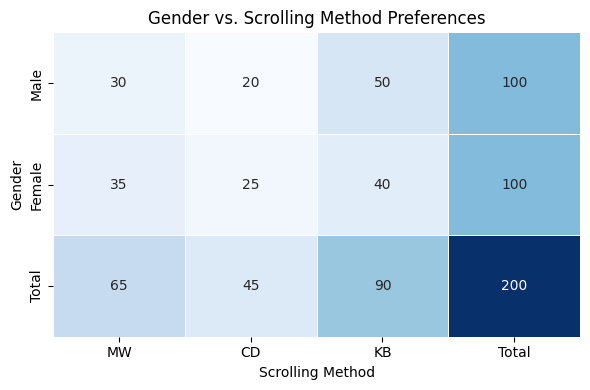

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_chi2, annot=True, cmap="Blues", fmt="d", linewidths=.5, cbar=False)
plt.title('Gender vs. Scrolling Method Preferences')
plt.xlabel('Scrolling Method')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

In [ ]:
# Convert the expected frequencies to a DataFrame for better readability
df_expected = pd.DataFrame(expected, columns=["MW", "CD", "KB"], index=["Male", "Female"])

# Display the expected frequencies
print("\nExpected Frequencies:")
print(df_expected)


Expected Frequencies:
          MW    CD    KB
Male    32.5  22.5  45.0
Female  32.5  22.5  45.0


In [ ]:
chi2, p_value, dof, expected = chi2_contingency(df_chi2.iloc[:-1, :-1])  # Exclude the final row and column for the test
print(f"\nChi-Squared result: Chi2 = {chi2:.3f}, p-value = {p_value:.3f}")


Chi-Squared result: Chi2 = 2.051, p-value = 0.359


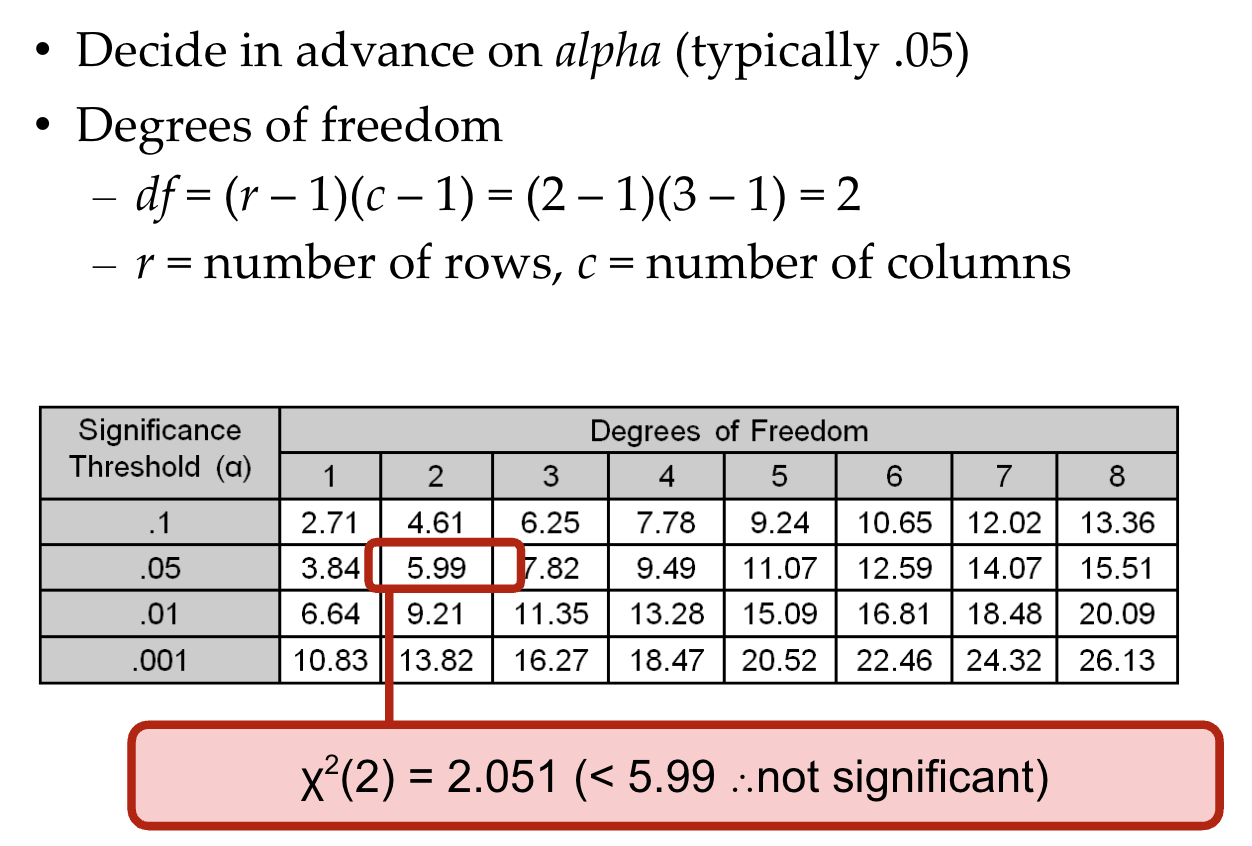

# Mann-Whitney U Test
##### Research Question: Is there a difference in political leanings between Mac and PC users?
##### Experiment Details: 20 participants, 10 Mac users and 10 PC users, rated their political leaning on a scale from 1 (liberal) to 10 (conservative).

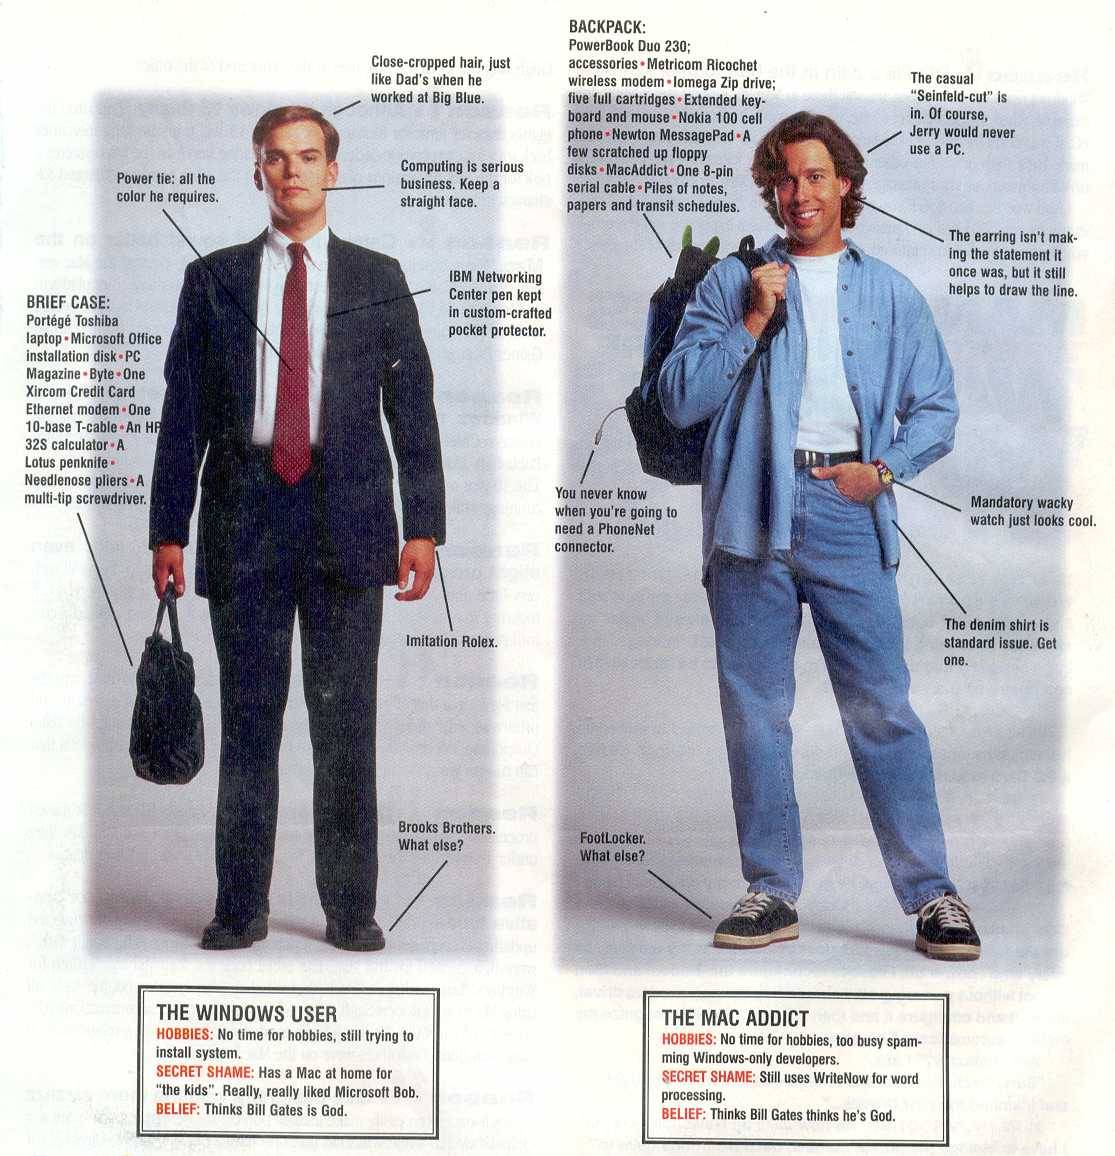


In [ ]:
# Political leaning scores (1-10 scale)
mac_users = [3, 4, 5, 3, 3, 4, 3, 2, 5, 3]
pc_users = [5, 6, 6, 5, 4, 6, 5, 7, 6, 4]

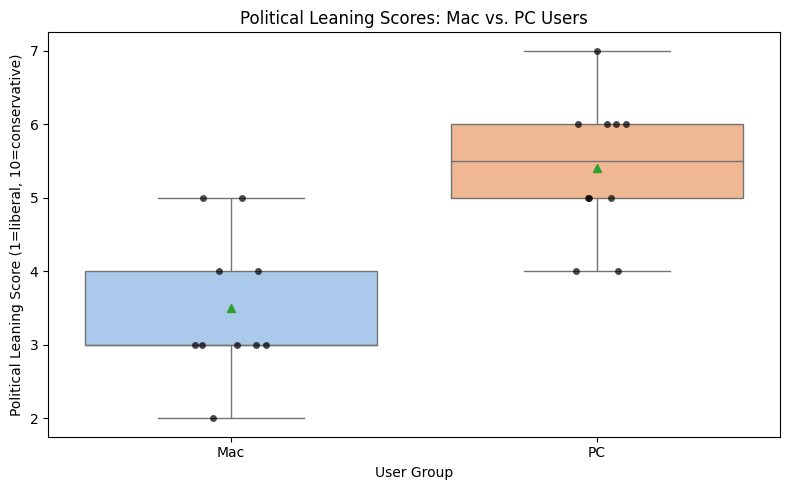

In [ ]:
df_scores = pd.DataFrame({
    'Score': mac_users + pc_users,
    'Group': ['Mac'] * len(mac_users) + ['PC'] * len(pc_users)
})

# Visualization: Boxplot and Stripplot for comparison of political leanings between Mac and PC users
plt.figure(figsize=(8, 5))
sns.boxplot(x='Group', y='Score', data=df_scores, hue='Group', showmeans=True, palette='pastel', dodge=False)
sns.stripplot(x='Group', y='Score', data=df_scores, color='black', alpha=0.7, jitter=True, dodge=False, legend=False)

plt.title('Political Leaning Scores: Mac vs. PC Users')
plt.xlabel('User Group')
plt.ylabel('Political Leaning Score (1=liberal, 10=conservative)')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
stat, p_value = mannwhitneyu(mac_users, pc_users)
print(f"Mann-Whitney U Test result: U-statistic = {stat}, p-value = {p_value:.3f}")

Mann-Whitney U Test result: U-statistic = 9.0, p-value = 0.002


# Friedman Test
##### Research Question: Do users rate different search engine interfaces differently?
##### Experiment Details: 8 participants rated four search engine interfaces (A, B, C, D) on a scale of 1-100.

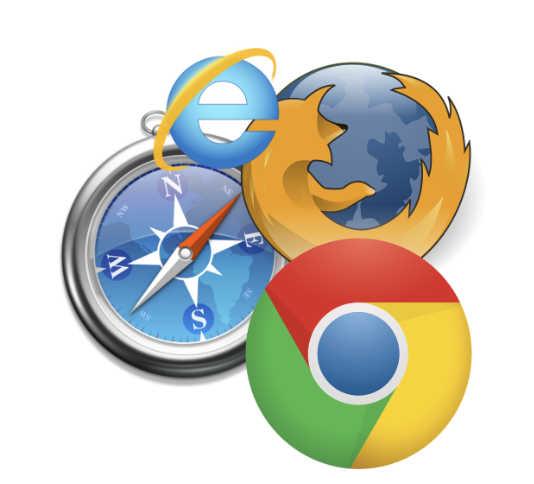

In [ ]:
# Ratings by 8 participants for four interfaces (A, B, C, D)
interface_A = [71, 70, 72, 68, 69, 73, 74, 75]
interface_B = [68, 67, 69, 66, 70, 68, 69, 67]
interface_C = [60, 59, 61, 60, 58, 60, 61, 62]
interface_D = [69, 70, 68, 67, 66, 69, 70, 68]


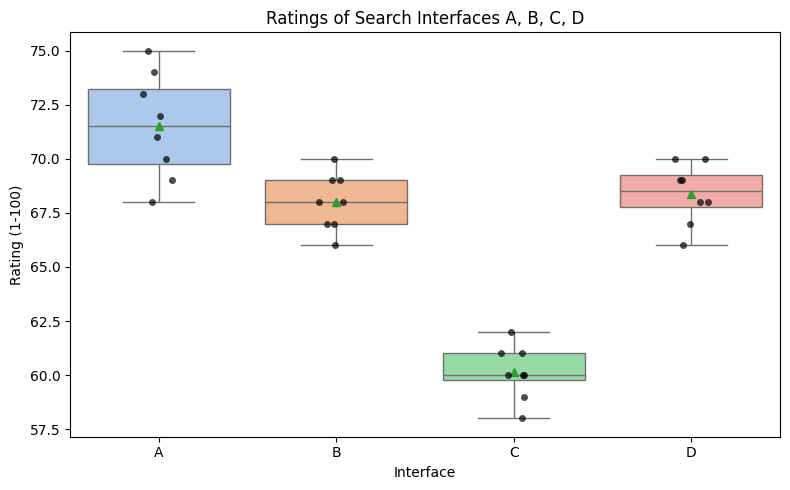

In [ ]:
df_ratings = pd.DataFrame({
    'Interface': ['A'] * len(interface_A) + ['B'] * len(interface_B) + ['C'] * len(interface_C) + ['D'] * len(interface_D),
    'Rating': interface_A + interface_B + interface_C + interface_D
})

# Visualization: Boxplot and Stripplot for ratings comparison across interfaces
plt.figure(figsize=(8, 5))
sns.boxplot(x='Interface', y='Rating', data=df_ratings, hue='Interface', showmeans=True, palette='pastel', dodge=False)
sns.stripplot(x='Interface', y='Rating', data=df_ratings, color='black', alpha=0.7, jitter=True, legend=False)

plt.title('Ratings of Search Interfaces A, B, C, D')
plt.xlabel('Interface')
plt.ylabel('Rating (1-100)')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# Perform Friedman Test
stat, p_value = friedmanchisquare(interface_A, interface_B, interface_C, interface_D)
print(f"Friedman Test result: Chi2 = {stat:.3f}, p-value = {p_value:.3f}")

Friedman Test result: Chi2 = 19.861, p-value = 0.000


In [ ]:
# Ensure the p-value is treated as a float
if p_value < 0.05:
    # Combine data into a single list with group labels
    ratings = interface_A + interface_B + interface_C + interface_D
    groups = ['A'] * len(interface_A) + ['B'] * len(interface_B) + ['C'] * len(interface_C) + ['D'] * len(interface_D)

    # Convert ratings and groups into a DataFrame
    df_ratings = pd.DataFrame({'Rating': ratings, 'Group': groups})

    # Perform Dunn's post hoc test with Bonferroni correction
    posthoc_result = posthoc_dunn(df_ratings, val_col='Rating', group_col='Group', p_adjust='bonferroni')
    print("\nDunn's Test Post Hoc Results:")
    print(posthoc_result)

    # Determine significant pairs
    significance_level = 0.05
    significant_pairs = posthoc_result[posthoc_result < significance_level]
    print("\nSignificant Pairwise Comparisons (p < 0.05):")
    print(significant_pairs.dropna(how='all', axis=0).dropna(how='all', axis=1))
else:
    print("\nFriedman test was not significant; no post hoc test needed.")


Dunn's Test Post Hoc Results:
          A         B         C         D
A  1.000000  0.198817  0.000013  0.461706
B  0.198817  1.000000  0.056034  1.000000
C  0.000013  0.056034  1.000000  0.018389
D  0.461706  1.000000  0.018389  1.000000

Significant Pairwise Comparisons (p < 0.05):
          A         C         D
A       NaN  0.000013       NaN
C  0.000013       NaN  0.018389
D       NaN  0.018389       NaN


# Kruskal-Wallis H Test
##### Research Question: Does acceptance of a new GPS device vary across different age groups?
##### Experiment Details: 24 participants divided into three age groups (20-29, 30-39, 40-49). Ratings from 1-10.

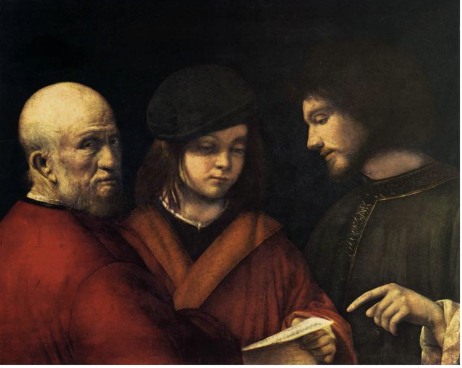


In [ ]:
# Ratings for each age group
age_20_29 = [8, 7, 9, 7, 8, 7, 9, 8]
age_30_39 = [5, 4, 5, 6, 5, 4, 5, 4]
age_40_49 = [3, 2, 3, 3, 2, 3, 2, 3]

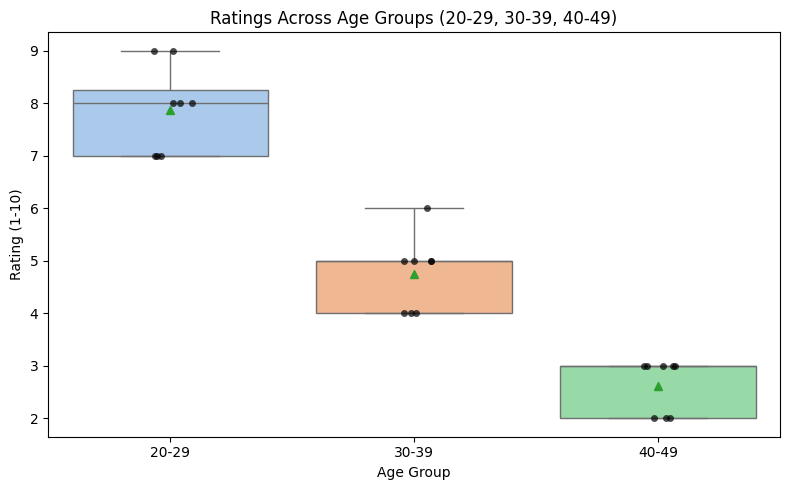

In [ ]:
df_age_ratings = pd.DataFrame({
    'Rating': age_20_29 + age_30_39 + age_40_49,
    'Age Group': ['20-29'] * len(age_20_29) + ['30-39'] * len(age_30_39) + ['40-49'] * len(age_40_49)
})

# Visualization: Boxplot and Stripplot for ratings comparison across age groups
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age Group', y='Rating', data=df_age_ratings, hue='Age Group', showmeans=True, palette='pastel', dodge=False)
sns.stripplot(x='Age Group', y='Rating', data=df_age_ratings, color='black', alpha=0.7, jitter=True, legend=False)

plt.title('Ratings Across Age Groups (20-29, 30-39, 40-49)')
plt.xlabel('Age Group')
plt.ylabel('Rating (1-10)')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# Perform Kruskal-Wallis H Test
stat, p_value = kruskal(age_20_29, age_30_39, age_40_49)
print(f"Kruskal-Wallis H Test result: H-statistic = {stat:.3f}, p-value = {p_value:.3f}")

Kruskal-Wallis H Test result: H-statistic = 20.907, p-value = 0.000


In [ ]:
# If the Kruskal-Wallis test is significant, perform Dunn's test for post hoc analysis
if p_value < 0.05:
    # Combine data into a single list with group labels
    ratings = age_20_29 + age_30_39 + age_40_49
    groups = ['20-29'] * len(age_20_29) + ['30-39'] * len(age_30_39) + ['40-49'] * len(age_40_49)

    df_ratings = pd.DataFrame({'Rating': ratings, 'Group': groups})

    # Perform Dunn's post hoc test with Bonferroni correction
    posthoc_result = posthoc_dunn(df_ratings, val_col='Rating', group_col='Group', p_adjust='bonferroni')
    print("\nDunn's Test Post Hoc Results:")
    print(posthoc_result)

    # Display significant pairs
    significance_level = 0.05
    significant_pairs = posthoc_result[posthoc_result < significance_level]
    print("\nSignificant Pairwise Comparisons (p < 0.05):")
    print(significant_pairs.dropna(how='all', axis=0).dropna(how='all', axis=1))
else:
    print("\nKruskal-Wallis test was not significant; no post hoc test needed.")


Dunn's Test Post Hoc Results:
          20-29     30-39     40-49
20-29  1.000000  0.066724  0.000014
30-39  0.066724  1.000000  0.066724
40-49  0.000014  0.066724  1.000000

Significant Pairwise Comparisons (p < 0.05):
          20-29     40-49
20-29       NaN  0.000014
40-49  0.000014       NaN


# Wilcoxon Signed-Rank Test

Research Question: How does typing speed and error rate on a mobile phone differ between walking and sitting conditions?

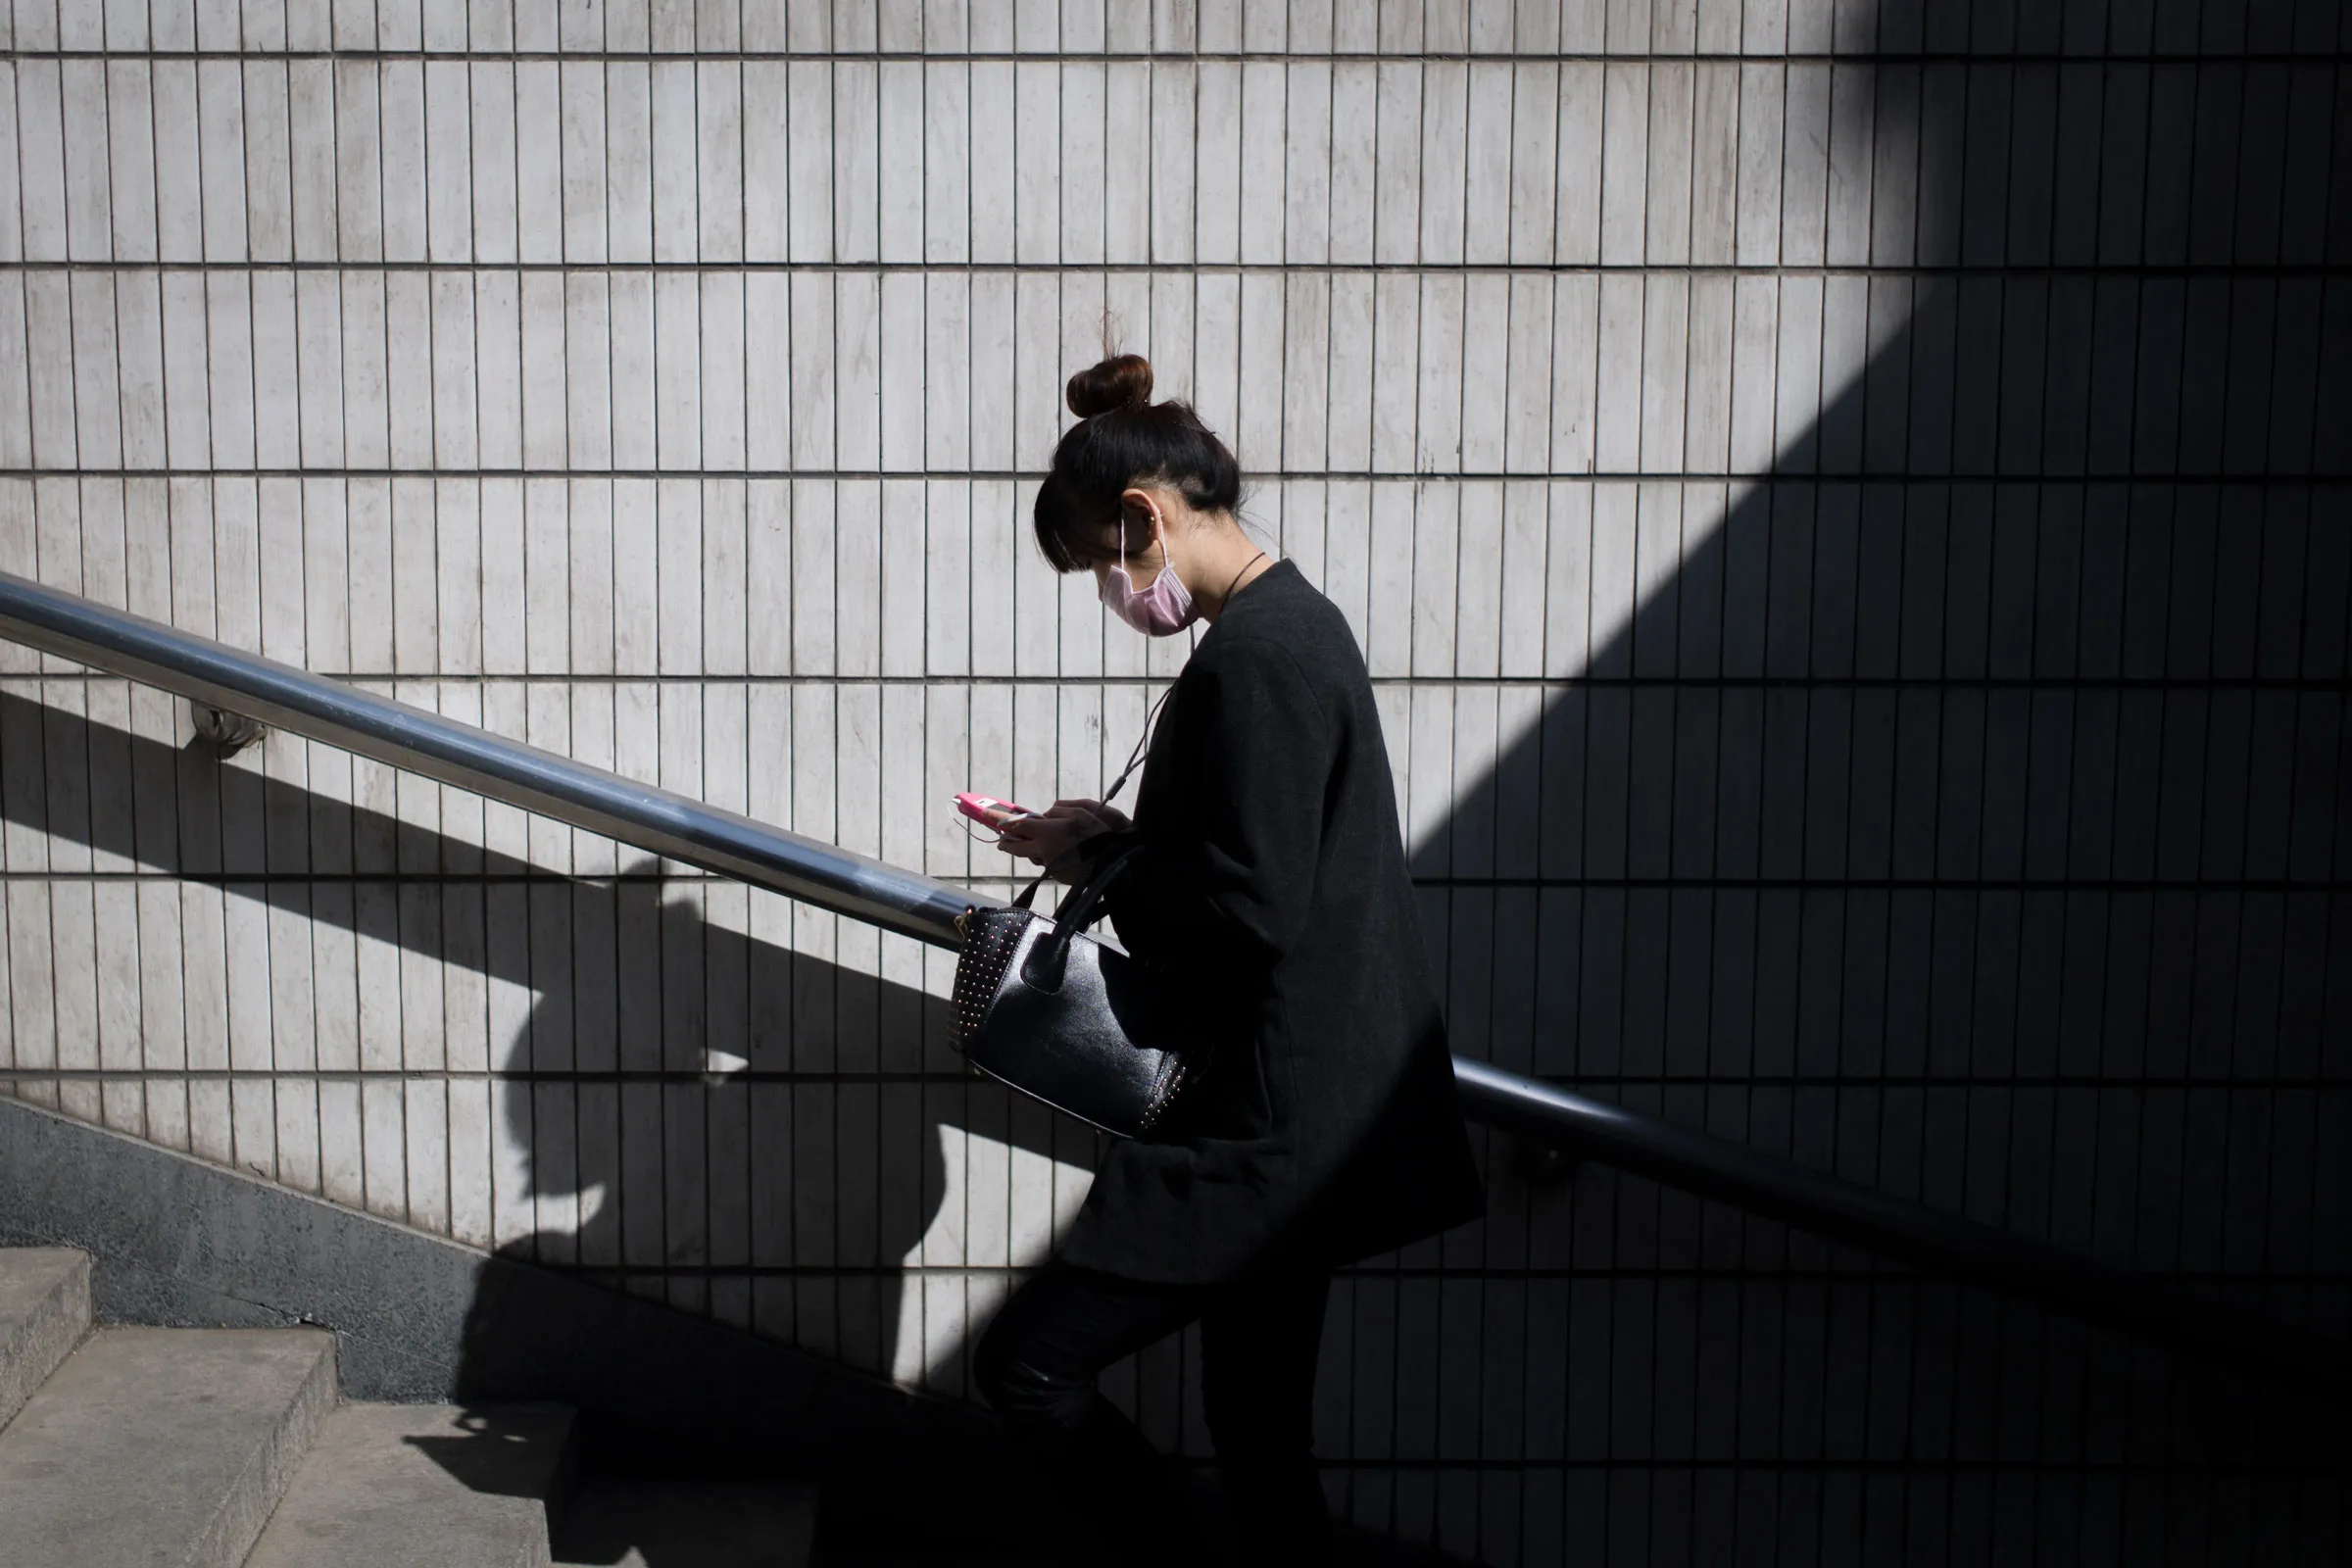


In [115]:
data_dir = 'typing-data'

sitting_dataframes = []

for i in range(1, 13):
    filename = f"P{i:02d}-S.csv"
    file_path = os.path.join(data_dir, filename)

    df = pd.read_csv(file_path)
    df.insert(0, "Participant", f"P{i:02d}")
    sitting_dataframes.append(df)

combined_sitting_data = pd.concat(sitting_dataframes, ignore_index=True)

print(combined_sitting_data.head)

<bound method NDFrame.head of      Participant                                      Phrase      Time  INF  \
0            P01                  my watch fell in the water  5.361702    1   
1            P01               prevailing wind from the east  7.142857    0   
2            P01           never too rich and never too thin  8.100000    0   
3            P01                      breathing is difficult  5.000000    0   
4            P01               I can see the rings on Saturn  5.207547    1   
...          ...                                         ...       ...  ...   
5995         P12            put garbage in an abandoned mine  5.142857    1   
5996         P12  employee recruitment takes a lot of effort  6.967742    0   
5997         P12               experience is hard to come by  4.430769    1   
5998         P12           everyone wants to win the lottery  5.508197    1   
5999         P12         the picket line gives me the chills  5.437500    1   

      IF  F   C  
0  

Let's look at all the columns in the data...

In [116]:
combined_sitting_data.columns

Index(['Participant', 'Phrase', 'Time', 'INF', 'IF', 'F', 'C'], dtype='object')

Here are all the column definitions:
- **Participant**: P01-12 who participated in the study.
- **Phrase:** 500 phrases picked from "Phrase Sets for Evaluating Text Entry Techniques" by I. Scott MacKenzie and R. William Soukoreff.
- **Time:** Time needed to complete typing the phrase (5 decimal places).
- **C:** Correct is computed as the diference of the larger length among transcribed and presented phrases and
the edit distance between them (MAX(P,T) - ED(P,T)), where P is the presented text string and T is the transcribed string.
- **INF:** Incorrect-not-fixed is the number of incorrect characters in the fnal transcript or simply the edit distance between presented and transcribed phrase ED(P,T).
- **IF:** Incorrect-fixed is the number of characters deleted during the text entry or the sum
of lengths of all the deletions during undos or backspace.
- **F:** Fixed is the sum of all delete actions.

We can do some easy computations on the presented strings... For example, we can calculate and add columns for total characters (including spaces) and total number of words.

In [117]:
combined_sitting_data["Total_Characters"] = combined_sitting_data["Phrase"].str.len()
combined_sitting_data["Word_Count"] = combined_sitting_data["Phrase"].str.split().str.len()

### How is Typing Speed (WPM) Calculated in Text Entry Experiments?
Typing speed is calculated using the formula:

$$
\text{WPM} = \frac{\text{Total Characters}}{5} \times \frac{60}{\text{Time (seconds)}}
$$

- **Total Characters**: Includes all characters typed, with spaces and punctuation.
- **5**: Assumes an average word length of 5 characters.
- **Time**: Total time taken in seconds.

Example: If 300 characters are typed in 100 seconds, then:

$$
\text{WPM} = \frac{300}{5} \times \frac{60}{100} = 60 \, \text{WPM}
$$


In [118]:
# combined_sitting_data["WPM"] = combined_sitting_data["Word_Count"] / (combined_sitting_data["Time"] / 60)
combined_sitting_data["WPM"] = (combined_sitting_data["Total_Characters"] / (combined_sitting_data["Time"])) * (60 / 5)

In [119]:
combined_sitting_data

,Participant,Phrase,Time,INF,IF,F,C,Total_Characters,Word_Count,WPM
0,P01,my watch fell in the water,5.361702,1,1,0,19,26,6,58.190478
1,P01,prevailing wind from the east,7.142857,0,0,1,25,29,5,48.720001
2,P01,never too rich and never too thin,8.100000,0,0,0,27,33,7,48.888889
3,P01,breathing is difficult,5.000000,0,0,1,20,22,3,52.800000
4,P01,I can see the rings on Saturn,5.207547,1,0,0,22,29,7,66.826089
...,...,...,...,...,...,...,...,...,...,...
5995,P12,put garbage in an abandoned mine,5.142857,1,1,1,25,32,6,74.666669
5996,P12,employee recruitment takes a lot of effort,6.967742,0,1,0,35,42,7,72.333333
5997,P12,experience is hard to come by,4.430769,1,0,0,23,29,6,78.541671
5998,P12,everyone wants to win the lottery,5.508197,1,1,0,26,33,6,71.892854


We can do a few more calculations to arrive at metrics often reported in text entry studies in HCI...

### Formulas for Utilized Bandwidth, Corrected Error Rate (CER), and Uncorrected Error Rate (UCER)

#### 1. Utilized Bandwidth
The formula for utilized bandwidth measures the proportion of correct keystrokes or gestures relative to the total keystrokes:

$$
\text{Utilized Bandwidth} = \frac{C}{C + \text{INF} + F + \text{IF}}
$$

- **C**: Correct entries (correctly transcribed characters).
- **INF**: Incorrect not fixed errors (mistakes not corrected by the user).
- **IF**: Incorrect fixed errors (mistakes corrected by the user).
- **F**: Fixes (actions like backspace used to correct errors).

---

#### 2. Corrected Error Rate (CER)
The formula for **CER** calculates the proportion of **fixed errors** relative to the total transcribed characters:

$$
\text{CER} = \frac{\text{IF}}{C + \text{INF} + F + \text{IF}}
$$

- **IF**: Incorrect fixed errors.
- **C**: Correct entries.
- **INF**: Incorrect not fixed errors.
- **F**: Fixes.

---

#### 3. Uncorrected Error Rate (UCER)
The formula for **UCER** calculates the proportion of **not fixed errors** relative to the total transcribed characters:

$$
\text{UCER} = \frac{\text{INF}}{C + \text{INF} + F + \text{IF}}
$$

- **INF**: Incorrect not fixed errors.
- **C**: Correct entries.
- **IF**: Incorrect fixed errors.
- **F**: Fixes.

---

These formulas evaluate the efficiency and accuracy of text entry methods by considering both the proportion of correct entries and the types of errors users encounter and correct.
a

In [120]:
# Calculate Utilized Bandwidth
# Utilized Bandwidth = C / (C + INF + F + IF)
combined_sitting_data["Utilized_Bandwidth"] = combined_sitting_data["C"] / (
    combined_sitting_data["C"] + combined_sitting_data["INF"] + combined_sitting_data["F"] + combined_sitting_data["IF"]
)

# Calculate Corrected Error Rate (CER)
# CER = IF / (C + INF + F)
combined_sitting_data["CER"] = combined_sitting_data["IF"] / (
    combined_sitting_data["C"] + combined_sitting_data["INF"] + combined_sitting_data["F"]
)

# Calculate Uncorrected Error Rate (UCER)
# UCER = INF / (C + INF + F)
combined_sitting_data["UCER"] = combined_sitting_data["INF"] / (
    combined_sitting_data["C"] + combined_sitting_data["INF"] + combined_sitting_data["F"]
)

# Calculate General Error Rate (Total Error Rate)
# General Error Rate = (INF + IF) / (C + INF + F)
combined_sitting_data["Error_Rate"] = (combined_sitting_data["INF"] + combined_sitting_data["IF"]) / (
    combined_sitting_data["C"] + combined_sitting_data["INF"] + combined_sitting_data["F"]
)

# Display the first few rows to verify calculations
print(combined_sitting_data[["Utilized_Bandwidth", "CER", "UCER", "Error_Rate"]].head())


   Utilized_Bandwidth   CER      UCER  Error_Rate
0            0.904762  0.05  0.050000    0.100000
1            0.961538  0.00  0.000000    0.000000
2            1.000000  0.00  0.000000    0.000000
3            0.952381  0.00  0.000000    0.000000
4            0.956522  0.00  0.043478    0.043478


In [121]:
combined_sitting_data

,Participant,Phrase,Time,INF,IF,F,C,Total_Characters,Word_Count,WPM,Utilized_Bandwidth,CER,UCER,Error_Rate
0,P01,my watch fell in the water,5.361702,1,1,0,19,26,6,58.190478,0.904762,0.050000,0.050000,0.100000
1,P01,prevailing wind from the east,7.142857,0,0,1,25,29,5,48.720001,0.961538,0.000000,0.000000,0.000000
2,P01,never too rich and never too thin,8.100000,0,0,0,27,33,7,48.888889,1.000000,0.000000,0.000000,0.000000
3,P01,breathing is difficult,5.000000,0,0,1,20,22,3,52.800000,0.952381,0.000000,0.000000,0.000000
4,P01,I can see the rings on Saturn,5.207547,1,0,0,22,29,7,66.826089,0.956522,0.000000,0.043478,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,P12,put garbage in an abandoned mine,5.142857,1,1,1,25,32,6,74.666669,0.892857,0.037037,0.037037,0.074074
5996,P12,employee recruitment takes a lot of effort,6.967742,0,1,0,35,42,7,72.333333,0.972222,0.028571,0.000000,0.028571
5997,P12,experience is hard to come by,4.430769,1,0,0,23,29,6,78.541671,0.958333,0.000000,0.041667,0.041667
5998,P12,everyone wants to win the lottery,5.508197,1,1,0,26,33,6,71.892854,0.928571,0.037037,0.037037,0.074074


Let's look at datatypes of resulting dataframe...

In [122]:
combined_sitting_data.dtypes

,0
Participant,object
Phrase,object
Time,float64
INF,int64
IF,int64
F,int64
C,int64
Total_Characters,int64
Word_Count,int64
WPM,float64


For most parametric and non-parametric tests, we compute mean values for a metric acorss participants first before applying the test. This is to ensure that if the individual sub-tasks varied across participants, we are still comparing an aggregate (apples to apples and not oranges!).

In [123]:
participant_means_sitting = combined_sitting_data.groupby("Participant").mean(numeric_only=True).reset_index()
print(participant_means_sitting["WPM"])

0     59.437966
1     53.156283
2     47.341921
3     35.750594
4     29.102470
5     44.607313
6     74.193266
7     38.342707
8     82.915359
9     53.611968
10    26.432961
11    65.094675
Name: WPM, dtype: float64


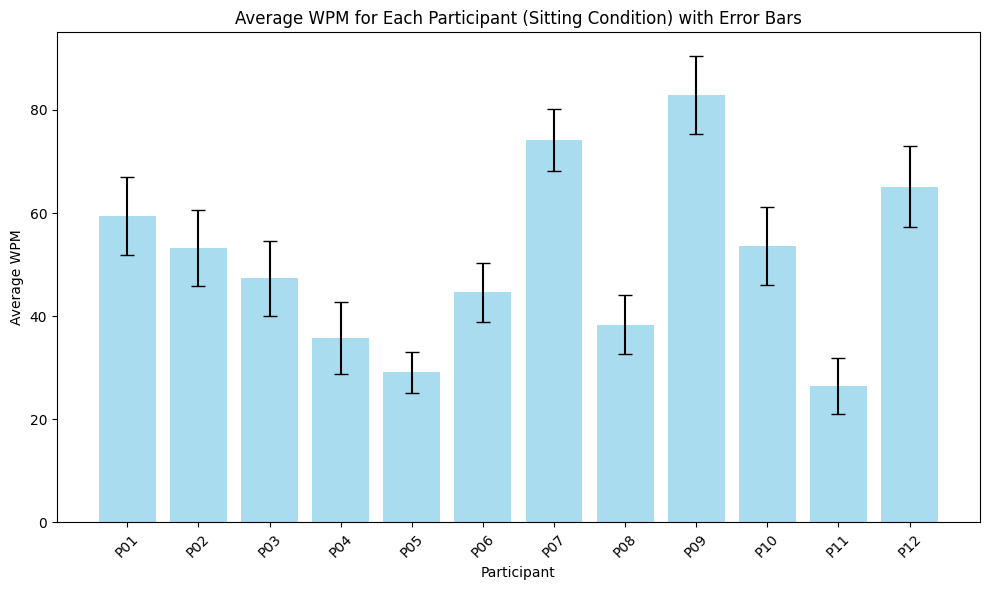

In [124]:
participant_std_sitting = combined_sitting_data.groupby("Participant").std(numeric_only=True).reset_index()

wpm_means = participant_means_sitting["WPM"]
wpm_stds = participant_std_sitting["WPM"]

plt.figure(figsize=(10, 6))
plt.bar(participant_means_sitting["Participant"], wpm_means, yerr=wpm_stds, capsize=5, color='skyblue', alpha=0.7)
plt.xlabel("Participant")
plt.ylabel("Average WPM")
plt.title("Average WPM for Each Participant (Sitting Condition) with Error Bars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's read the walking data and store it in the same format.

In [125]:
data_dir = 'typing-data'

sitting_dataframes = []

for i in range(1, 13):
    filename = f"P{i:02d}-W.csv"
    file_path = os.path.join(data_dir, filename)
    df = pd.read_csv(file_path)
    df.insert(0, "Participant", f"P{i:02d}")
    sitting_dataframes.append(df)

combined_sitting_data = pd.concat(sitting_dataframes, ignore_index=True)

print(combined_sitting_data)

combined_sitting_data["Total_Characters"] = combined_sitting_data["Phrase"].str.len()
combined_sitting_data["Word_Count"] = combined_sitting_data["Phrase"].str.split().str.len()
combined_sitting_data["WPM"] = combined_sitting_data["Word_Count"] / (combined_sitting_data["Time"] / 60)

# Utilized Bandwidth = C / (C + INF + F + IF)
combined_sitting_data["Utilized_Bandwidth"] = combined_sitting_data["C"] / (
    combined_sitting_data["C"] + combined_sitting_data["INF"] + combined_sitting_data["F"] + combined_sitting_data["IF"]
)

# CER = IF / (C + INF + F)
combined_sitting_data["CER"] = combined_sitting_data["IF"] / (
    combined_sitting_data["C"] + combined_sitting_data["INF"] + combined_sitting_data["F"]
)

# UCER = INF / (C + INF + F)
combined_sitting_data["UCER"] = combined_sitting_data["INF"] / (
    combined_sitting_data["C"] + combined_sitting_data["INF"] + combined_sitting_data["F"]
)

# General Error Rate = (INF + IF) / (C + INF + F)
combined_sitting_data["Error_Rate"] = (combined_sitting_data["INF"] + combined_sitting_data["IF"]) / (
    combined_sitting_data["C"] + combined_sitting_data["INF"] + combined_sitting_data["F"]
)

participant_means_walking = combined_sitting_data.groupby("Participant").mean(numeric_only=True).reset_index()

     Participant                                      Phrase      Time  INF  \
0            P01                  my watch fell in the water  5.727273    2   
1            P01               prevailing wind from the east  7.500000    0   
2            P01           never too rich and never too thin  9.529412    0   
3            P01                      breathing is difficult  5.217391    1   
4            P01               I can see the rings on Saturn  6.731707    0   
...          ...                                         ...       ...  ...   
5995         P12            put garbage in an abandoned mine  6.352941    2   
5996         P12  employee recruitment takes a lot of effort  9.818182    1   
5997         P12               experience is hard to come by  7.578947    0   
5998         P12           everyone wants to win the lottery  7.813953    1   
5999         P12         the picket line gives me the chills  6.960000    2   

      IF  F   C  
0      1  1  18  
1      0  0  25

In [126]:
wpm_mean_comparison = participant_means_sitting[['Participant', 'WPM']].set_index('Participant').join(participant_means_walking[['Participant', 'WPM']].set_index('Participant'), lsuffix='_Sitting', rsuffix='_Walking').reset_index()


In [127]:
wpm_mean_comparison

,Participant,WPM_Sitting,WPM_Walking
0,P01,59.437966,48.774779
1,P02,53.156283,42.908026
2,P03,47.341921,38.001080
3,P04,35.750594,29.217350
4,P05,29.102470,23.855635
5,P06,44.607313,36.094960
6,P07,74.193266,60.168427
7,P08,38.342707,31.406258
8,P09,82.915359,68.072443
9,P10,53.611968,43.217865


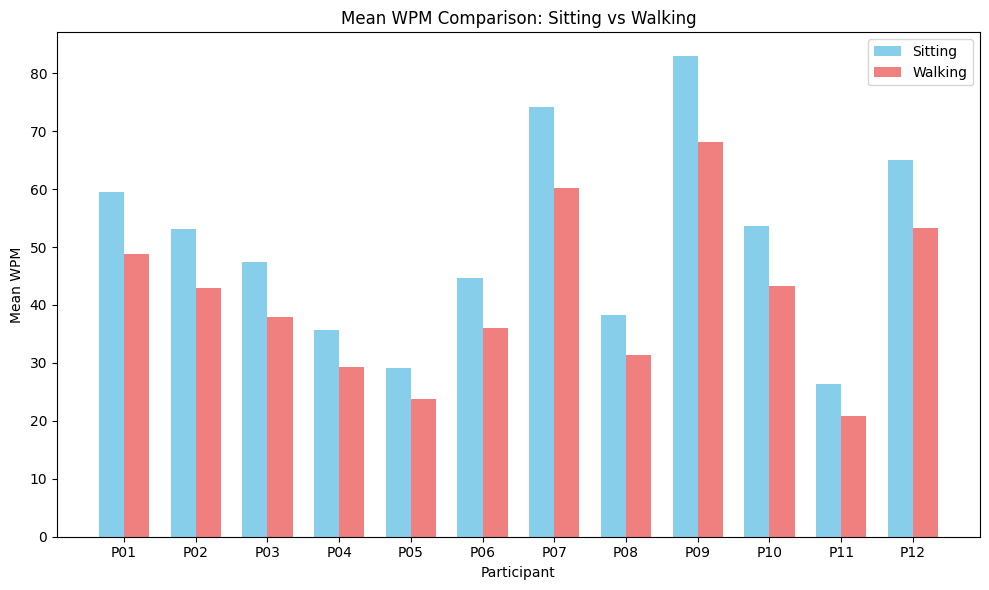

In [128]:
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(wpm_mean_comparison['Participant']))
plt.bar(index - bar_width/2, wpm_mean_comparison['WPM_Sitting'], width=bar_width, label='Sitting', color='skyblue')

plt.bar(index + bar_width/2, wpm_mean_comparison['WPM_Walking'], width=bar_width, label='Walking', color='lightcoral')
plt.xlabel('Participant')
plt.ylabel('Mean WPM')
plt.title('Mean WPM Comparison: Sitting vs Walking')
plt.xticks(index, wpm_mean_comparison['Participant'])
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Assignment 3. Generate a new data point based on your typing while sitting vs. walking

Your task in this assignment is to record your text entry performance in both sitting and walking conditions, then compare it to other data points in the dataset we are studying.

Use the [TextTest++ software](https://drustz.com/TextTestPP/) to automatically log your typing speed and edits. This tool will help you track both conditions systematically.

To ensure a reasonable level of ecological validity, ideally, you would collect 500 phrases in each setting (approximately 30 minutes per condition). However, for this assignment, it’s sufficient to log at least 50 phrases for both sitting and walking conditions.

For the walking condition, you can either designate two points in a room and walk back and forth between them or use a treadmill at a walking pace. If you’re unable to walk due to a disability or temporary condition, standing and typing is an acceptable alternative.

##### **Documentation Requirements:**  
Make sure to thoroughly document your data collection process, including:
- The phrase set you used (available at: [https://www.yorku.ca/mack/chi03b.html](https://www.yorku.ca/mack/chi03b.html)),
- The number of phrases recorded,
- Details about the environment in which the data was collected,
- How you implemented the walking condition,
- Any data cleaning steps you took to compute your typing speed (WPM) for each condition.

---


##### **Part 1:** Explain in text how you generated the new data point. [1 Point]

Answer:

If you use the Texttest++ software, you can use the following code as a starting point to extract the data point.

In [111]:
# json_path = 'data.json'  # Replace with the path to your JSON file
# with open(json_path, 'r') as file:
#     data = json.load(file)

# df = pd.DataFrame(data)

# df['Word_Count'] = df['Transcribed'].apply(lambda x: len(x.split()))
# df['WPM'] = df['Word_Count'] / (df['Time'] / 60000)

# df['F'] = df['Action'].apply(lambda x: sum(1 for action in x if action[0] == 'delete'))
# df['Utilized_Bandwidth'] = df['C'] / (df['C'] + df['INF'] + df['IF'] + df['F'])
# df['CER'] = df['IF'] / (df['C'] + df['INF'] + df['F'])
# df['UCER'] = df['INF'] / (df['C'] + df['INF'] + df['F'])

# df['Total_Error_Rate'] = (df['INF'] + df['IF']) / (df['C'] + df['INF'] + df['F'])

# # Calculate the averages of each metric
# average_metrics = {
#     'Average_WPM': df['WPM'].mean(),
#     'Average_Utilized_Bandwidth': df['Utilized_Bandwidth'].mean(),
#     'Average_CER': df['CER'].mean(),
#     'Average_UCER': df['UCER'].mean(),
#     'Average_Total_Error_Rate': df['Total_Error_Rate'].mean()
# }

# average_metrics_df = pd.DataFrame([average_metrics])
# print(average_metrics_df)

##### **Part 2:** Append the new data point to the wpm_mean_comparison dataframe to create a dataframe with 13 datapoints and average speeds in words per minute for 13 original participants and you (P13). [1 Point]

##### **Part 3:** Add you new datapoint in the combined Average WPM vs. Participant visualization presented earlier. [1 Point]

##### **Part 4:** Rerun Wilcoxin Signed Rank Test. [1 Point]

##### **Part 5:** Report a conclusion using the format specified in [lecture slides (slide 70)](https://docs.google.com/presentation/d/10KdzWXOVtPfLrcNQ9N4mfl1LU3dqfs5E/edit?usp=sharing&ouid=104913367015461668120&rtpof=true&sd=true). [1 Point]

Answer:

##### **BONUS:** Create a dataframe for one other metric, append the new data point, create a visualization, rerun Wilcoxin Signed Rank Test, and report a conclusion.